In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import cm
import scipy.stats as st

In [2]:
#importing the atp and wta dataframes
atp="Deuces/Resources/all_mens_matches.csv"
wta="Deuces/Resources/all_womens_matches.csv"
atp_2017="Deuces/Resources/atp_matches_2017.csv"
atp_2018="Deuces/Resources/atp_matches_2018.csv"
atp_df=pd.read_csv(atp)
wta_df=pd.read_csv(wta)

In [3]:
print(atp_df.columns)
atp_df.head()

print(wta_df.columns)

Index(['Unnamed: 0', 'Tourney_Name', 'Surface', 'Tournament_Placement',
       'Winner_Name', 'Winner_Hand', 'Loser_Hand', 'Winner_Country',
       'Winner_Age', 'Match Format', 'Year'],
      dtype='object')
Index(['Unnamed: 0', 'Tourney_Name', 'Surface', 'Tournament_Placement',
       'Winner_Name', 'Winner_Hand', 'Loser_HandWinner_Country', 'Winner_Age',
       'Match Format', 'Year'],
      dtype='object')


In [3]:
#sorting data by years
atp_2017=atp_df.loc[(atp_df["Year"]==2017)]
atp_2018=atp_df.loc[(atp_df["Year"]==2018)]
atp_2019=atp_df.loc[(atp_df["Year"]==2019)]
atp_2020=atp_df.loc[(atp_df["Year"]==2020)]
atp_2021=atp_df.loc[(atp_df["Year"]==2021)]

wta_2017=wta_df.loc[(wta_df["Year"]==2017)]
wta_2018=wta_df.loc[(wta_df["Year"]==2018)]
wta_2019=wta_df.loc[(wta_df["Year"]==2019)]
wta_2020=wta_df.loc[(wta_df["Year"]==2020)]
wta_2021=wta_df.loc[(wta_df["Year"]==2021)]

In [4]:
#sorting years dataframes for only the winners of F, SF, QF

atp_2017_finalists_df=atp_2017.loc[(atp_2017["Tournament_Placement"]=="F")|(atp_2017["Tournament_Placement"]=="SF")|(atp_2017["Tournament_Placement"]=="QF")]
atp_2018_finalists_df=atp_2018.loc[(atp_2018["Tournament_Placement"]=="F")|(atp_2018["Tournament_Placement"]=="SF")|(atp_2018["Tournament_Placement"]=="QF")]
atp_2019_finalists_df=atp_2019.loc[(atp_2019["Tournament_Placement"]=="F")|(atp_2019["Tournament_Placement"]=="SF")|(atp_2019["Tournament_Placement"]=="QF")]
atp_2020_finalists_df=atp_2020.loc[(atp_2020["Tournament_Placement"]=="F")|(atp_2020["Tournament_Placement"]=="SF")|(atp_2020["Tournament_Placement"]=="QF")]
atp_2021_finalists_df=atp_2021.loc[(atp_2021["Tournament_Placement"]=="F")|(atp_2021["Tournament_Placement"]=="SF")|(atp_2021["Tournament_Placement"]=="QF")]


wta_2017_finalists_df=wta_2017.loc[(wta_2017["Tournament_Placement"]=="F")|(wta_2017["Tournament_Placement"]=="SF")|(wta_2017["Tournament_Placement"]=="QF")]
wta_2018_finalists_df=wta_2018.loc[(wta_2018["Tournament_Placement"]=="F")|(wta_2018["Tournament_Placement"]=="SF")|(wta_2018["Tournament_Placement"]=="QF")]
wta_2019_finalists_df=wta_2019.loc[(wta_2019["Tournament_Placement"]=="F")|(wta_2019["Tournament_Placement"]=="SF")|(wta_2019["Tournament_Placement"]=="QF")]
wta_2020_finalists_df=wta_2020.loc[(wta_2020["Tournament_Placement"]=="F")|(wta_2020["Tournament_Placement"]=="SF")|(wta_2020["Tournament_Placement"]=="QF")]
wta_2021_finalists_df=wta_2021.loc[(wta_2021["Tournament_Placement"]=="F")|(wta_2021["Tournament_Placement"]=="SF")|(wta_2021["Tournament_Placement"]=="QF")]


In [5]:
#grouping wta data by Winner_Name and finding the number of times they won wach year
atp_2017_groups=atp_2017_finalists_df.groupby(["Winner_Name"])
atp_count_2017=atp_2017_groups["Winner_Name"].count()
atp_2018_groups=atp_2018_finalists_df.groupby(["Winner_Name"])
atp_count_2018=atp_2018_groups["Winner_Name"].count()
atp_2019_groups=atp_2019_finalists_df.groupby(["Winner_Name"])
atp_count_2019=atp_2019_groups["Winner_Name"].count()
atp_2020_groups=atp_2020_finalists_df.groupby(["Winner_Name"])
atp_count_2020=atp_2020_groups["Winner_Name"].count()
atp_2021_groups=atp_2021_finalists_df.groupby(["Winner_Name"])
atp_count_2021=atp_2021_groups["Winner_Name"].count()

#using the number of wins and creating a DF
atp_points_df=pd.DataFrame({"2017":atp_count_2017, "2018":atp_count_2018, "2019":atp_count_2019, "2020":atp_count_2020, "2021":atp_count_2021})

#filled empty values with 0
atp_points_df=atp_points_df.fillna(0)

#Sum the wins each year
atp_points_df["total"]=atp_points_df.sum(axis=1)

#sorted by total number of points
atp_points_df=atp_points_df.sort_values(["total"],ascending=False)
atp_top_20_total=atp_points_df.head(20)
atp_top_20_total

,2017,2018,2019,2020,2021,total
Winner_Name,,,,,,
Novak Djokovic,9.0,18.0,20.0,17.0,21.0,85.0
Rafael Nadal,26.0,17.0,20.0,8.0,7.0,78.0
Alexander Zverev,19.0,19.0,9.0,11.0,20.0,78.0
Daniil Medvedev,3.0,11.0,25.0,7.0,20.0,66.0
Roger Federer,23.0,20.0,17.0,1.0,0.0,61.0
Stefanos Tsitsipas,1.0,11.0,19.0,9.0,16.0,56.0
Dominic Thiem,9.0,15.0,20.0,6.0,1.0,51.0
Andrey Rublev,4.0,3.0,5.0,15.0,15.0,42.0
Roberto Bautista Agut,10.0,10.0,6.0,5.0,5.0,36.0


In [6]:
#grouping wta data by Winner_Name and finding the number of times they won wach year
wta_2017_groups=wta_2017_finalists_df.groupby(["Winner_Name"])
wta_count_2017=wta_2017_groups["Winner_Name"].count()
wta_2018_groups=wta_2018_finalists_df.groupby(["Winner_Name"])
wta_count_2018=wta_2018_groups["Winner_Name"].count()
wta_2019_groups=wta_2019_finalists_df.groupby(["Winner_Name"])
wta_count_2019=wta_2019_groups["Winner_Name"].count()
wta_2020_groups=wta_2020_finalists_df.groupby(["Winner_Name"])
wta_count_2020=wta_2020_groups["Winner_Name"].count()
wta_2021_groups=wta_2021_finalists_df.groupby(["Winner_Name"])
wta_count_2021=wta_2021_groups["Winner_Name"].count()

#using the number of wins and creating a DF
wta_points_df=pd.DataFrame({"2017":wta_count_2017, "2018":wta_count_2018, "2019":wta_count_2019, "2020":wta_count_2020, "2021":wta_count_2021})

#filled empty values with 0
wta_points_df=wta_points_df.fillna(0)

#Sum the wins each year
wta_points_df["total"]=wta_points_df.sum(axis=1)

#sorted by total number of points
wta_points_df=wta_points_df.sort_values(["total"],ascending=False)
wta_top_20_total=wta_points_df.head(20)
wta_top_20_total

,2017,2018,2019,2020,2021,total
Winner_Name,,,,,,
Ashleigh Barty,7.0,10.0,17.0,5.0,17.0,56.0
Simona Halep,13.0,17.0,8.0,10.0,4.0,52.0
Karolina Pliskova,13.0,10.0,15.0,5.0,7.0,50.0
Aryna Sabalenka,3.0,11.0,12.0,11.0,11.0,48.0
Elina Svitolina,16.0,12.0,6.0,6.0,6.0,46.0
Petra Kvitova,4.0,16.0,11.0,4.0,5.0,40.0
Garbine Muguruza,11.0,8.0,3.0,4.0,12.0,38.0
Kiki Bertens,7.0,11.0,16.0,3.0,0.0,37.0
Elise Mertens,8.0,11.0,4.0,5.0,7.0,35.0


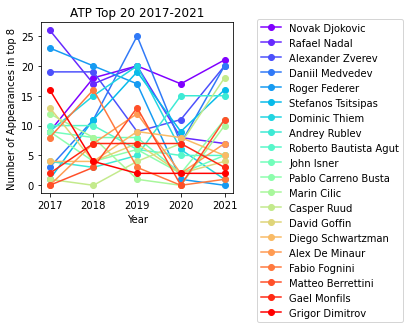

In [21]:
#sorting the total out of DF
atp_top_20=atp_top_20_total.iloc[:,0:5]
atp_top_20

#created loop to plot the data
color = cm.rainbow(np.linspace(0, 1, 20))
i=0
for x in atp_top_20.iterrows():
    labels=x[0]
    plt.plot(x[1].index, x[1].values, label=labels, marker='o',color=color[i])
    plt.legend(loc="best", bbox_to_anchor=(1.1, 1.05))
    i+=1

#Created Labels
plt.xlabel("Year")
plt.ylabel("Number of Appearances in top 8")
plt.title("ATP Top 20 2017-2021") 

#Saved image
plt.tight_layout()
plt.savefig('../Output/atp_top_20', dpi = 300)
plt.show()

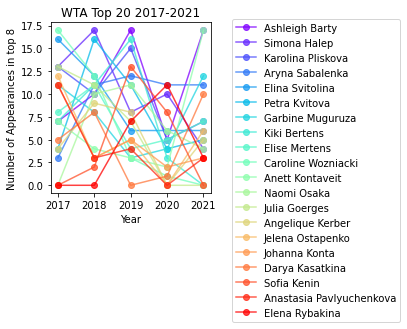

In [22]:
#sorted by total number of points
wta_top_20=wta_top_20_total.iloc[:,0:5]

#created loop to plot the data
color = cm.rainbow(np.linspace(0, 1, 20))
i=0
for x in wta_top_20.iterrows():
    labels=x[0]
    plt.plot(x[1].index, x[1].values, label=labels, marker='o', alpha=0.75,color=color[i])
    plt.legend(loc="best", bbox_to_anchor=(1.1, 1.05))
    i+=1
    
#Created Labels    
plt.xlabel("Year")
plt.ylabel("Number of Appearances in top 8")
plt.title("WTA Top 20 2017-2021")

#Saved image
plt.tight_layout()
plt.savefig('../Output/wta_top_20', dpi = 300)
plt.show()

In [ ]:
#finding mean, medium, sd, variance of total points
mean_atp = np.mean(atp_top_20_total["total"])
median_atp=np.median(atp_top_20_total["total"])
sd_atp= np.std(atp_top_20_total["total"],ddof = 0)
var_atp= np.var(atp_top_20_total["total"],ddof = 0)

mean_wta = np.mean(wta_top_20_total["total"])
median_wta=np.median(wta_top_20_total["total"])
sd_wta= np.std(wta_top_20_total["total"],ddof = 0)
var_wta= np.var(wta_top_20_total["total"],ddof = 0)

print(f'The mean total points of the ATP League is {mean_atp}.')
print(f'The mean total points of the WTA League is {mean_wta}.')
print(f'The median total points of the ATP League is {median_atp}.')
print(f'The median total points of the WTA League is {median_wta}.')
print(f'The Variance of the total points in the ATP League is {var_atp}.')
print(f'The Variance of the total points in the WTA League is {var_wta}.')
print(f'The Standard Deviation of the total points in the ATP League is {round(sd_atp,2)}.')
print(f'The Standard Deviation of the total points in the WTA League is {round(sd_wta,2)}.')